<img style="float: center;" src="logo-isel.PNG">

<h1><center>PDS Trabalho Prático 2</center></h1>
<h2><center>Ano letivo 2020/2021</center></h2>


<h3>Docentes:</h3>
<h4>André Lourenço</h4>
<h4>Isabel Rodrigues</h4>

<h3>Trabalho realizado por:</h3>
<h4>António Ferreira nº 47500</h4>
<h4>Duarte Franco nº 42362</h4>

### Import's:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.io.wavfile as wav
import IPython.display as ipd

<center><h2>I. Processamento de Sinais usando Android Science Journal</h2></center>

<img style="float: center;" src="coord.PNG">

Métodos usados para a recolha de dados:

- O sensor foi usado ao nível da cintura;
- A direção do trajecto foi retilínea;
- O eixo do apontado para a frente foi o do eixo dos y's.

## 1. Passada Normal

- Ao recolher os dados foi possível observar no documento csv parcelas com o acrónimo *NaN* (*Not a Number*), para resolver este problema obtou-se por fixar esses *NaN's* com valores médios entre o máximo e o mínimo do sinal. Assim sendo os dados analisádos já não estavam "corronpidos".

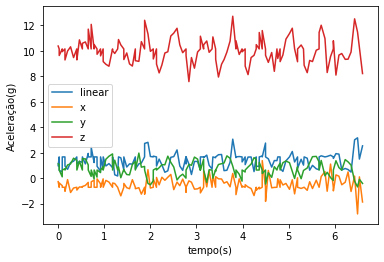

In [2]:
dados_andar = np.genfromtxt('6_metros_andar.csv',delimiter=',',skip_header=1) #foram 10 passos, 6 metros

tempo_andar  = dados_andar[:,0]/1000 #para estar em segundos
linear_andar = dados_andar[:,1]
x_andar      = dados_andar[:,2]
y_andar      = dados_andar[:,3]
z_andar      = dados_andar[:,4]

max_lAndar = np.nanmax(linear_andar)
min_lAndar = np.nanmin(linear_andar)
med_lAndar = (max_lAndar + min_lAndar) /2
linear_andar[np.isnan(linear_andar)] = med_lAndar # sub o valor np.nan() para valor médio

max_xAndar = np.nanmax(x_andar)
min_xAndar = np.nanmin(x_andar)
med_xAndar = (max_xAndar + min_xAndar) /2
x_andar[np.isnan(x_andar)] = med_xAndar # sub o valor np.nan() para valor médio

max_yAndar = np.nanmax(y_andar)
min_yAndar = np.nanmin(y_andar)
med_yAndar = (max_yAndar + min_yAndar) /2
y_andar[np.isnan(y_andar)] = med_yAndar # sub o valor np.nan() para valor médio


max_zAndar = np.nanmax(z_andar)
min_zAndar = np.nanmin(z_andar)
med_zAndar = (max_zAndar + min_zAndar) /2
z_andar[np.isnan(z_andar)] = med_zAndar # sub o valor np.nan() para valor médio

plt.plot(tempo_andar, linear_andar)
plt.plot(tempo_andar, x_andar)
plt.plot(tempo_andar, y_andar)
plt.plot(tempo_andar, z_andar)
plt.legend(['linear','x','y', 'z'])
plt.xlabel('tempo(s)')
plt.ylabel('Aceleração(g)')
plt.show()


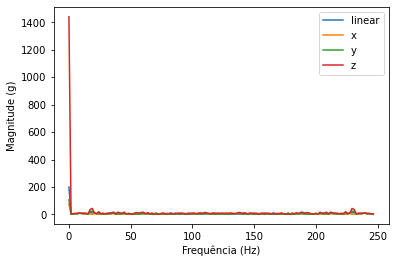

In [3]:
Fs              = 500 # Devido ao sensor o telemóvel
Ts              = 1/Fs
fk_linear_andar = np.fft.fftfreq(len(linear_andar), Ts)
sample_rate     = np.max(fk_linear_andar)

# Retorna os coeficientes de transformação de Fourier como números complexo
transformed_y      = np.fft.fft(y_andar)
transformed_x      = np.fft.fft(x_andar)
transformed_z      = np.fft.fft(z_andar)
transformed_linear = np.fft.fft(linear_andar)

# Pegua no valor absoluto dos números complexos para o espectro de magnitude
freqs_magnitude_y      = np.abs(transformed_y)
freqs_magnitude_x      = np.abs(transformed_x)
freqs_magnitude_z      = np.abs(transformed_z)
freqs_magnitude_linear = np.abs(transformed_linear)

# Cria o eixo x de frequência que estende até à taxa de amostragem
freq_axis_y      = np.linspace(0, sample_rate, len(freqs_magnitude_y))
freq_axis_x      = np.linspace(0, sample_rate, len(freqs_magnitude_x))
freq_axis_z      = np.linspace(0, sample_rate, len(freqs_magnitude_z))
freq_axis_linear = np.linspace(0, sample_rate, len(freqs_magnitude_linear))

# Plot
plt.plot(freq_axis_linear, freqs_magnitude_linear)
plt.plot(freq_axis_x, freqs_magnitude_x)
plt.plot(freq_axis_y, freqs_magnitude_y)
plt.plot(freq_axis_z, freqs_magnitude_z)
plt.legend(['linear','x','y', 'z'])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (g)')
plt.show()

#### a) Contar o número de passos efetuados 

<img style="float: left;" src="passo_esquema.PNG">

- A contebilização de cada passo efetuado é feita quando há uma alteração no eixo dos z's no domínio do tempo. 

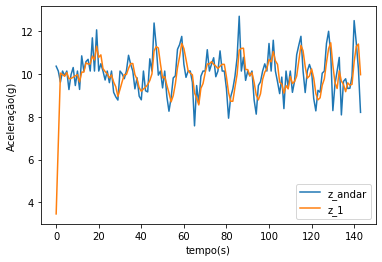

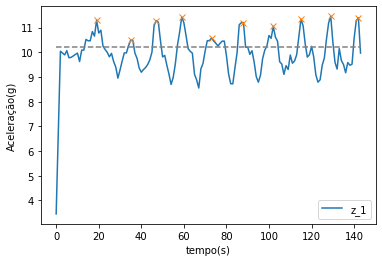

Foram efectuados cerca de 10 passos.


In [4]:
M_andar = 3
h_andar = 1/M_andar * np.ones(M_andar)
a = [1]
z_1 = ss.lfilter(h_andar,a,z_andar)

plt.plot(z_andar)
plt.plot(z_1)
plt.legend(['z_andar','z_1'])
plt.xlabel('tempo(s)')
plt.ylabel('Aceleração(g)')
plt.figure()

peaks, _ = ss.find_peaks(z_1, height=10.2, distance=9)
plt.plot(z_1)
plt.plot(peaks, z_1[peaks], "x")
plt.plot(np.zeros_like(z_1)+10.2, "--", color="gray")
plt.legend(['z_1'])
plt.xlabel('tempo(s)')
plt.ylabel('Aceleração(g)')
plt.show()
numero_passos_andar = len(peaks)
print('Foram efectuados cerca de ' + str(numero_passos_andar) + ' passos.')

#### b) Cálculo da velocidade da passada

- Para o cálculo da velocidade da passada ocorreu duas maneiras de a cálcular:
- A 1º indo pelo tempo médio entre cada passada, multiplicando pela aceleração média do trajecto.
- A 2º hipótese foi calcular a velocidade média com todos os dados obtidos e depois dividir esse valor pelo número de passos.

- I

In [5]:
tempo_de_passo_andar = tempo_andar[peaks]
array_t = np.zeros(len(tempo_de_passo_andar))
for i in range(len(tempo_de_passo_andar)):
    if i == 0:
        array_t[i] = tempo_de_passo_andar[i]
    else:
        array_t[i] = tempo_de_passo_andar[i] - tempo_de_passo_andar[i-1]

tempo_medio_passo_andar = np.sum(array_t) / len(array_t)

In [6]:
ac_medio = np.sum(y_andar) / len(y_andar)

vel_de_pass = ac_medio * tempo_medio_passo_andar
print('A velocidade da passada é de ' + str(round(vel_de_pass,3)) + ' metros por segundo.')

A velocidade da passada é de 0.487 metros por segundo.


- II

In [7]:
array = np.zeros(len(y_andar))
for i in range(len(y_andar)):
    if i == 0:
        array[i] = y_andar[i] * 0.0
    else: 
        array[i] = y_andar[i] * (tempo_andar[i] - tempo_andar[i-1])
        
vel_passada = round((np.sum(array) ) / numero_passos_andar, 3)
print('A velocidade da passada é de ' + str(vel_passada) + ' metros por segundo.')

A velocidade da passada é de 0.512 metros por segundo.


#### c) Distância percorrida

<img style="float: center;" src="distance.PNG">

- Segundo o PDF disponibilizado para o desenvolvimento do trabalho prático é possível recolher a informação que se o utilizador saber em média quanto mede a sua passada e juntando aos dados recolhidos pelo acelerômetro.
- Existe uma proporcionalidade direta entre o número de passos e a distância de cada passada.
- Assim sendo na célula abaixo foi realizada essa mesma proporção.

In [8]:
dispancia_por_passo = 0.6 # 60 centimetros
distancia = numero_passos_andar * dispancia_por_passo
print('Distância percorrida é de ' + str(int(distancia)) + ' metros.')

Distância percorrida é de 6 metros.


## 2. Passada em Corrida

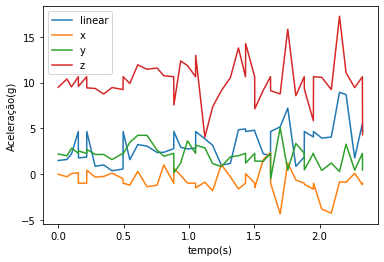

In [9]:
dados_correr = np.genfromtxt('6_metros_correr.csv',delimiter=',',skip_header=1) #foram 5 passos, 6 metros

tempo_correr = dados_correr[:,0]/1000 #para estar em segundos
linear      = dados_correr[:,1]
x           = dados_correr[:,2]
y           = dados_correr[:,3]
z           = dados_correr[:,4]

max_linear = np.nanmax(linear)
min_linear = np.nanmin(linear)
med_linear = (max_linear + min_linear) /2
linear[np.isnan(linear)] = med_linear # sub o valor np.nan() para valor médio

max_x = np.nanmax(x)
min_x = np.nanmin(x)
med_x = (max_x + min_x) /2
x[np.isnan(x)] = med_x # sub o valor np.nan() para valor médio

max_y = np.nanmax(y)
min_y = np.nanmin(y)
med_y = (max_y + min_y) /2
y[np.isnan(y)] = med_y # sub o valor np.nan() para valor médio


max_z = np.nanmax(z)
min_z = np.nanmin(z)
med_z = (max_z + min_z) /2
z[np.isnan(z)] = med_z # sub o valor np.nan() para valor médio

plt.plot(tempo_correr, linear)
plt.plot(tempo_correr, x)
plt.plot(tempo_correr, y)
plt.plot(tempo_correr, z)
plt.legend(['linear','x','y', 'z'])
plt.xlabel('tempo(s)')
plt.ylabel('Aceleração(g)')
plt.show()

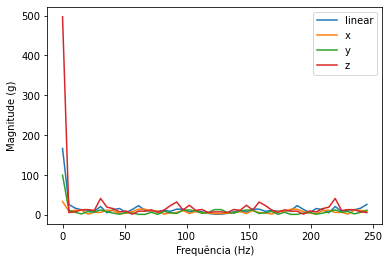

In [10]:
Fs        = 500 # Devido do sensor o telemóvel
Ts        = 1/Fs
fk_linear = np.fft.fftfreq(len(linear), Ts)
sample_rate = np.max(fk_linear)

# Retorna os coeficientes de transformação de Fourier como números complexos 
transformed_y = np.fft.fft(y)
transformed_x = np.fft.fft(x)
transformed_z = np.fft.fft(z)
transformed_linear = np.fft.fft(linear)


# Pegua no valor absoluto dos números complexos para o espectro de magnitude 
freqs_magnitude_y = np.abs(transformed_y)
freqs_magnitude_x = np.abs(transformed_x)
freqs_magnitude_z = np.abs(transformed_z)
freqs_magnitude_linear = np.abs(transformed_linear)

# Cria o eixo x de frequência que estende até à taxa de amostragem 
freq_axis_y = np.linspace(0, sample_rate, len(freqs_magnitude_y))
freq_axis_x = np.linspace(0, sample_rate, len(freqs_magnitude_x))
freq_axis_z = np.linspace(0, sample_rate, len(freqs_magnitude_z))
freq_axis_linear = np.linspace(0, sample_rate, len(freqs_magnitude_linear))

# Plot 
plt.plot(freq_axis_linear, freqs_magnitude_linear)
plt.plot(freq_axis_x, freqs_magnitude_x)
plt.plot(freq_axis_y, freqs_magnitude_y)
plt.plot(freq_axis_z, freqs_magnitude_z)
plt.legend(['linear','x','y', 'z'])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (g)')
plt.show()

#### a) Contar o número de passos efetuados em corrida

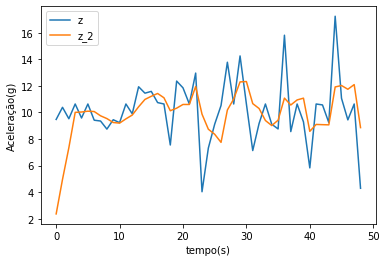

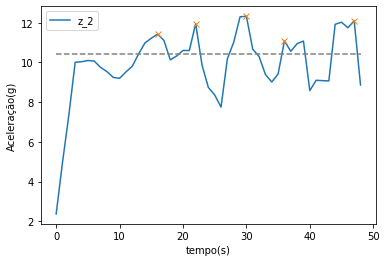

Foram efectuados cerca de 5.


In [11]:
M_correr = 4
h_correr = 1/M_correr * np.ones(M_correr)
a = [1]
z_2 = ss.lfilter(h_correr,a,z)

plt.plot(z)
plt.plot(z_2)
plt.legend(['z','z_2'])
plt.xlabel('tempo(s)')
plt.ylabel('Aceleração(g)')
plt.figure()

peaks, _ = ss.find_peaks(z_2, height=10.4, distance=5)
plt.plot(z_2)
plt.plot(peaks, z_2[peaks], "x")
plt.plot(np.zeros_like(z_2)+10.4, "--", color="gray")
plt.legend(['z_2'])
plt.xlabel('tempo(s)')
plt.ylabel('Aceleração(g)')
plt.show()

numero_passos_correr = len(peaks)
print('Foram efectuados cerca de ' + str(numero_passos_correr) + '.')

#### b) Cálculo da velocidade da passada

- I

In [12]:
tempo_de_passo_correr = tempo_correr[peaks]
array_c = np.zeros(len(tempo_de_passo_correr))
for i in range(len(tempo_de_passo_correr)):
    if i == 0:
        array_c[i] = tempo_de_passo_correr[i]
    else:
        array_c[i] = tempo_de_passo_correr[i] - tempo_de_passo_correr[i-1]

tempo_medio_passo_correr = np.sum(array_c) / len(array_c)

In [13]:
ac_medio_corrida = np.sum(y) / len(y)

vel_de_pass_corrida = ac_medio_corrida * tempo_medio_passo_correr
print('A velocidade da passada é de ' + str(round(vel_de_pass_corrida,3)) + ' metros por segundo')

A velocidade da passada é de 0.949 metros por segundo


- II

In [14]:
array_correr = np.zeros(len(y))
for i in range(len(y)):
    if i == 0:
        array_correr[i] = y[i] * 0.0
    else: 
        array_correr[i] = y[i] * (tempo_correr[i] - tempo_correr[i-1])  
        
vel_passadaCorrer = round(sum(array_correr) / numero_passos_correr, 3)
print('A velocidade da passada é de ' + str(vel_passadaCorrer) + ' metros por segundo.')

A velocidade da passada é de 1.025 metros por segundo.


#### c) Distância percorrida

In [15]:
dispancia_por_passo = 1.2 # 1 metro e vinte centimetros
distancia = numero_passos_correr * dispancia_por_passo
print('Distância percorrida é de ' + str(int(distancia)) + ' metros.')

Distância percorrida é de 6 metros.


<center><h3>Apreciações</h3></center>

- Diferença entre a entre a marcha e a corrida:
- Na marcha os dados recolhidos são mais agitados do que nos dados recolhidos na corrida, devido a uma maior lentidão do processo.
- Já nos dados recolhidos na corrida devido à impulsão muscular no inicio da gravação há uma disturpação relativa nos dados, mas ao longo do trajeto os dados tornam-se bastantes claros.


<center><h2>II. Processamento de Sinais usando wavs</h2></center>

## 1. Análise do ficheiro wav

- Para visualizar os graficos dos sons foi criada a função visualise que mostra o sinal no dominio do tempo, frequência e o seu respectivo espectograma.

In [16]:
def Visualise(AudioFile):
    Fs,x =wav.read(AudioFile)
    Ts=1/Fs
    N=len(x)*Ts
    
    #Time
    print(AudioFile)
    plt.title('Sinal no dominio do tempo')
    plt.xlabel('Tempo(s)')
    plt.ylabel('Amplitude')
    t=np.arange(0,N,Ts)
    plt.plot(t,x)
    plt.show()
    
    #Frequency
    plt.title('Sinal no dominio da frequencia')
    plt.xlabel('Frequencia(Hz)')
    plt.ylabel('|Xk|')
    XX = np.abs(np.fft.fft(x))
    f  = np.arange(len(x))/len(x)*Fs
    plt.plot(f,XX)
    plt.show()
    
    #Specgram
    print("Espectograma:")
    plt.xlabel("Tempo(s)")
    plt.ylabel("Freq(Hz)")
    plt.specgram(x,Fs = Fs)
    plt.colorbar()
    plt.show()
    

#### a) Testes

- I (Clap 1):

Clap1.wav


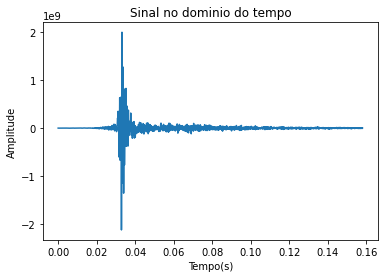

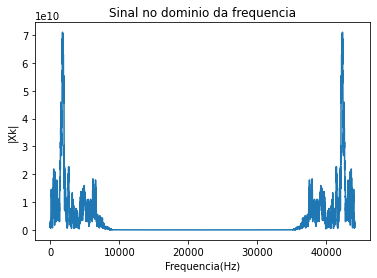

Espectograma:


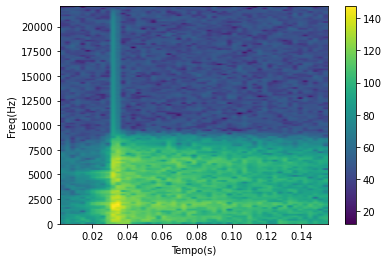

In [17]:
Visualise('Clap1.wav')
ipd.Audio('Clap1.wav') # load a local WAV file

- II (Whistle 1):

Whistle1.wav


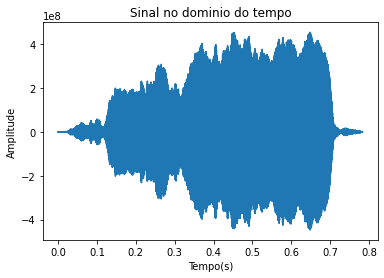

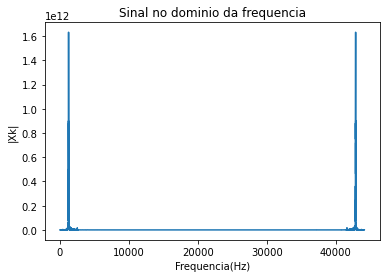

Espectograma:


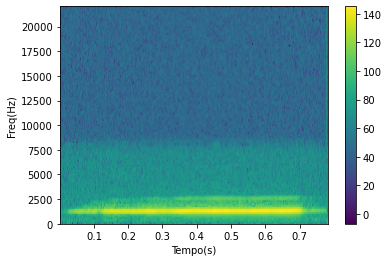

In [18]:
Visualise('Whistle1.wav')
ipd.Audio('Whistle1.wav') # load a local WAV file

- A partir dos graficos no dominio do tempo podemos observar que o ADSR (Attack, Decay, Sustain e Release) do assobio são completamente diferentes do de palmas apresentando um attack e decay mais bruto no exemplo das palmas, no entanto a partir do grafido do dominio da frequencia pode-se observar que o assobio apresenta um menor número de frequências principais do que as palmas(o mesmo pode ser observado a partir do espectograma)

## 2. Processo automático de classificação entre palmas e assobios

- A função whistleOrClap vai destingir o som como *Clap* ou *Whistle* dependendo do ficheiro audio recebido.
- Para tal esta função verifica a quantidade de frequências principais utilizando isso para destinguir entre os dois tipos de sons, se tiver um valor baixo dessas frequências é um assobio caso contrario é conciderado palmas.

In [19]:
from IPython.display import display

In [20]:
def whistleOrClap(Audio):
    Fs,x =wav.read(Audio)
    Ts=1/Fs
    N=len(x)*Ts
    XX=np.abs(np.fft.fft(x))
    XX=XX/np.max(XX)
    perc=np.max(XX)/100
    XX2=XX[:]>perc
    count = np.count_nonzero(XX2)
    Per=(count*100)/len(XX)
    #print(count)
    #print(len(XXa))
    #print(Per)
    if(Per>10.0):
        return "It's a Clap"
    else:
        X  = np.fft.fft(x) / len(x)
        fk = np.fft.fftfreq(len(X), Ts)
        print("O pitch do sinal é: " + str(round(np.max(fk),3)) + ' Hz')
        return "It's a Whistle"


#### a) Testes

- I (Multi Whistle 1):

MultiWhistle.wav


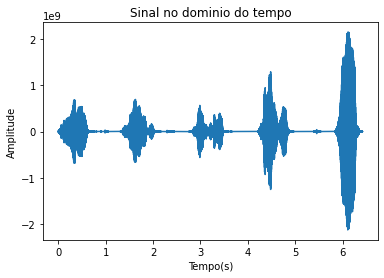

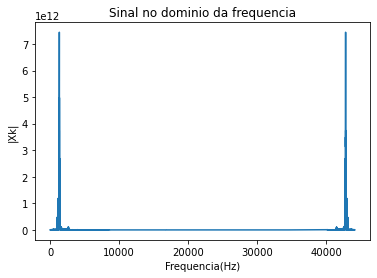

Espectograma:


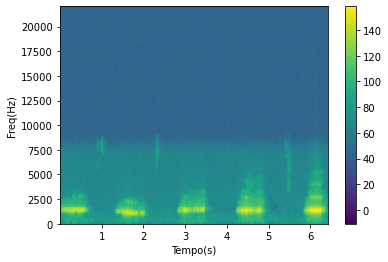

O pitch do sinal é: 22049.844 Hz


"It's a Whistle"

In [21]:
Visualise('MultiWhistle.wav')
whistleOrClap('MultiWhistle.wav')

In [22]:
ipd.Audio('MultiWhistle.wav') # load a local WAV file

- II (Multi Clap 1):

MultiClap.wav


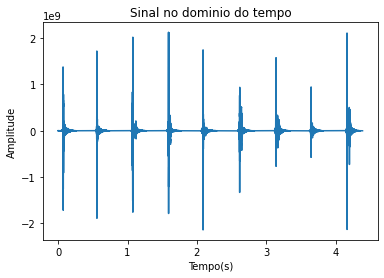

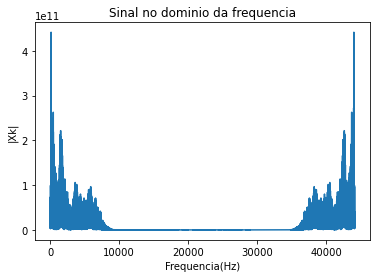

Espectograma:


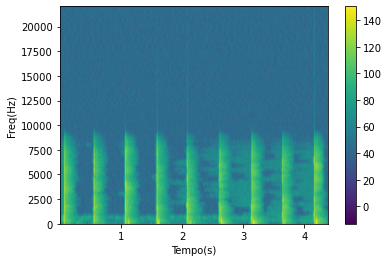

"It's a Clap"

In [23]:
Visualise('MultiClap.wav')
whistleOrClap('MultiClap.wav')

In [24]:
ipd.Audio('MultiClap.wav') # load a local WAV file

- III (Multi Whistle 2 ):

MultiWhistle2.wav


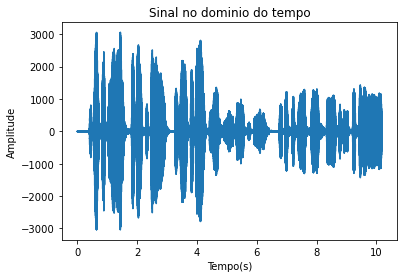

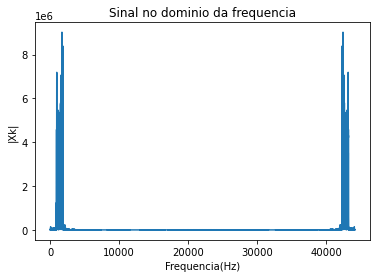

Espectograma:


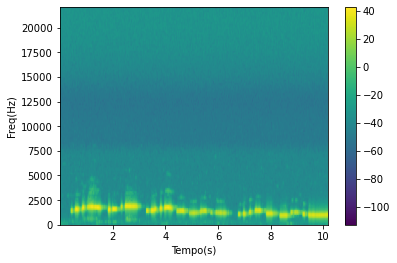

O pitch do sinal é: 22049.951 Hz


"It's a Whistle"

In [25]:
Visualise('MultiWhistle2.wav')
whistleOrClap('MultiWhistle2.wav')

In [26]:
ipd.Audio('MultiWhistle2.wav') # load a local WAV file

- IV (Multi Clap 2 ):

MultiClap2.wav


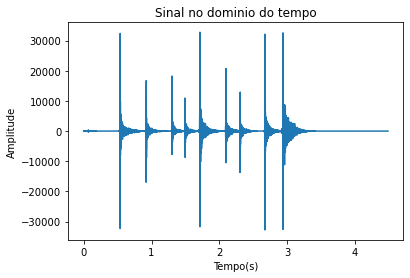

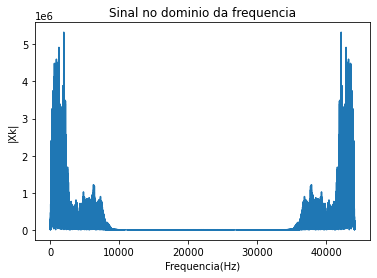

Espectograma:


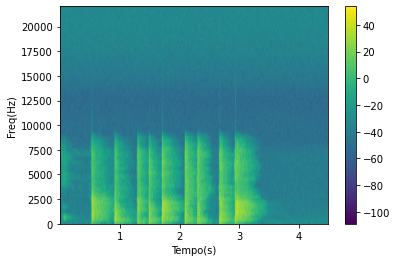

"It's a Clap"

In [27]:
Visualise('MultiClap2.wav')
whistleOrClap('MultiClap2.wav')

In [28]:
ipd.Audio('MultiClap2.wav') # load a local WAV file

- V (Whistle 2):

Whistle2.wav


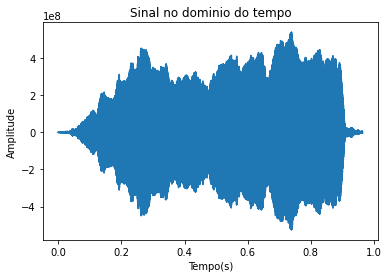

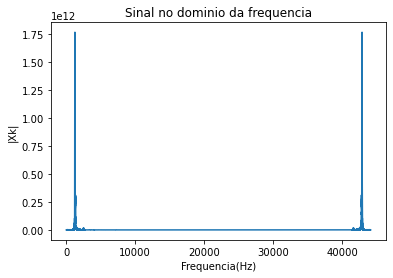

Espectograma:


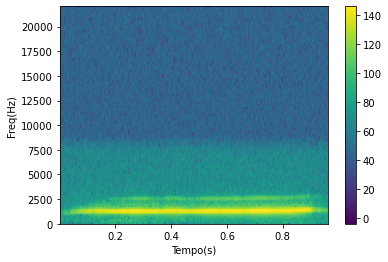

O pitch do sinal é: 22048.962 Hz


"It's a Whistle"

In [29]:
Visualise('Whistle2.wav')
whistleOrClap('Whistle2.wav')

In [30]:
ipd.Audio('Whistle2.wav') # load a local WAV file

- VI (Clap 2):

Clap2.wav


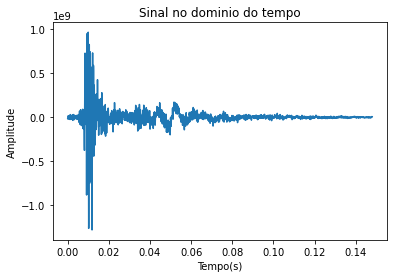

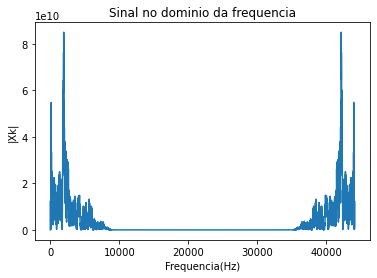

Espectograma:


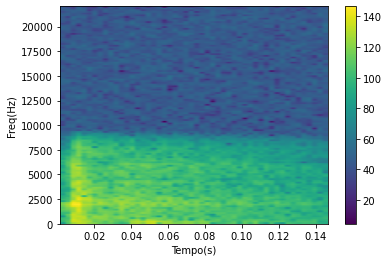

"It's a Clap"

In [31]:
Visualise('Clap2.wav')
whistleOrClap('Clap2.wav')

In [32]:
ipd.Audio('Clap2.wav') # load a local WAV file